<a href="https://colab.research.google.com/github/Mingyang0816/Korean-Drama-Recommender/blob/main/K_Drama_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyvis

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import networkx as nx
from pyvis.network import Network
import IPython
from IPython.core.display import display, HTML

#1. Import Dataset

In [3]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load dataset from Google Drive
path = "/content/drive/My Drive/UCLA_Data_Science_Clubs/Korean Drama (DataRes)/kdrama.csv"
kdrama_df = pd.read_csv(path)

In [5]:
# Check first few rows of dataset
kdrama_df.head(5)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


#2. Data Cleaning

In [6]:
# Check data type of columns
kdrama_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  250 non-null    object 
 1   Aired Date            250 non-null    object 
 2   Year of release       250 non-null    int64  
 3   Original Network      250 non-null    object 
 4   Aired On              250 non-null    object 
 5   Number of Episodes    250 non-null    int64  
 6   Duration              250 non-null    object 
 7   Content Rating        245 non-null    object 
 8   Rating                250 non-null    float64
 9   Synopsis              250 non-null    object 
 10  Genre                 250 non-null    object 
 11  Tags                  250 non-null    object 
 12  Director              249 non-null    object 
 13  Screenwriter          249 non-null    object 
 14  Cast                  250 non-null    object 
 15  Production companies  2

In [7]:
# Statistical summary
kdrama_df.describe()

,Year of release,Number of Episodes,Rating
count,250.00000,250.000000,250.000000
mean,2018.25600,19.064000,8.534000
std,3.26452,13.245743,0.221359
min,2003.00000,1.000000,8.300000
25%,2017.00000,16.000000,8.300000
50%,2019.00000,16.000000,8.500000
75%,2021.00000,20.000000,8.700000
max,2022.00000,133.000000,9.200000


In [8]:
# Dimensions of dataset
kdrama_df.shape

(250, 17)

Dataset consists of top 250 dramas with 17 features.

### **Anomalies**

In [9]:
# Check anomalies (Year of Release)
kdrama_df[kdrama_df["Year of release"] < 2010]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
72,Jewel in the Palace,"Sep 15, 2003 - Mar 23, 2004",2003,MBC,"Monday, Tuesday",54,1 hr. 5 min.,13+ - Teens 13 or older,8.6,About 500 years ago during the time of Chosun ...,"Food, Historical, Romance, Medical","Cooking, Strong Female Lead, Royal Rules And E...",Lee Byung Hoon,Kim Young Hyun,"Lee Young Ae, Ji Jin Hee, Hong Ri Na, Im Ho, Y...",MBC,#73
117,Queen Seon Duk,"May 25, 2009 - Dec 22, 2009",2009,MBC,"Monday, Tuesday",62,1 hr. 5 min.,15+ - Teens 15 or older,8.5,"The story of a beautiful queen, who has to giv...","Historical, Romance, Drama, Political","Power Struggle, Royalty, Smart Female Lead, Fe...","Park Hong Kyun, Kim Keun Hong","Kim Young Hyun, Park Sang Yeon","Lee Yo Won, Go Hyun Jung, Park Ye Jin, Yoo Seu...",Time Box Production,#118
202,Jumong,"May 15, 2006 - Mar 6, 2007",2006,MBC,"Monday, Tuesday",81,1 hr. 10 min.,15+ - Teens 15 or older,8.3,Jumong was the founder of Goguryeo in 37 BC. H...,"Adventure, Historical, Romance, Drama","Leadership, Strong Female Lead, Power Struggle...","Lee Joo Hwan, Kim Keun Hong","Choi Wan Kyu, Jung Hyung Soo","Song Il Gook, Han Hye Jin, Kim Seung Soo, Jeon...","Chorokbaem Media, Olive9",#203
240,Coffee Prince,"Jul 2, 2007 - Aug 28, 2007",2007,MBC,"Monday, Tuesday",17,60 min.,15+ - Teens 15 or older,8.3,Choi Han Gyul is the grandson of chairwoman Ba...,"Food, Comedy, Romance, Drama","Cross-Dressing, Hidden Identity, Boss-Employee...",Lee Yoon Jung,"Jang Hyun Joo, Lee Jung Ah","Gong Yoo, Yoon Eun Hye, Lee Sun Kyun, Chae Jun...",NaN,#241


In [10]:
# Check anomalies (Number of Episodes)
kdrama_df[kdrama_df["Number of Episodes"] > 50]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
72,Jewel in the Palace,"Sep 15, 2003 - Mar 23, 2004",2003,MBC,"Monday, Tuesday",54,1 hr. 5 min.,13+ - Teens 13 or older,8.6,About 500 years ago during the time of Chosun ...,"Food, Historical, Romance, Medical","Cooking, Strong Female Lead, Royal Rules And E...",Lee Byung Hoon,Kim Young Hyun,"Lee Young Ae, Ji Jin Hee, Hong Ri Na, Im Ho, Y...",MBC,#73
83,Empress Ki,"Oct 28, 2013 - Apr 29, 2014",2013,MBC,"Monday, Tuesday",51,1 hr. 5 min.,15+ - Teens 15 or older,8.6,Genghis Khan built an empire that spanned vast...,"Historical, Romance, Melodrama, Political","Smart Female Lead, Strong Female Lead, Power S...","Han Hee, Lee Sung Joon","Jang Young Chul, Jung Kyung Soon","Ha Ji Won, Ji Chang Wook, Joo Jin Mo, Baek Jin...",Victory Contents,#84
84,My Father is Strange,"Mar 4, 2017 - Aug 27, 2017",2017,KBS2,"Saturday, Sunday",52,1 hr. 6 min.,15+ - Teens 15 or older,8.6,This drama is about a family that lives on the...,"Comedy, Romance, Drama, Family","Family Secret, Sisterhood, Eccentric Female Le...",Lee Jae Sang,Lee Jung Sun,"Kim Yeong Cheol, Kim Hae Sook, Ryu Soo Young, ...",iHQ,#85
85,Once Again,"Mar 28, 2020 - Sep 13, 2020",2020,KBS2,"Saturday, Sunday",100,35 min.,15+ - Teens 15 or older,8.6,"""Once Again"" is the story of the eventful Song...","Comedy, Romance, Drama, Family","Divorce, Family Relationship, Multiple Couples...",Lee Jae Sang,Yang Hee Seung,"Chun Ho Jin, Cha Hwa Yun, Lee Jung Eun, Oh Dae...","Bon Factory Worldwide, Studio Dragon",#86
117,Queen Seon Duk,"May 25, 2009 - Dec 22, 2009",2009,MBC,"Monday, Tuesday",62,1 hr. 5 min.,15+ - Teens 15 or older,8.5,"The story of a beautiful queen, who has to giv...","Historical, Romance, Drama, Political","Power Struggle, Royalty, Smart Female Lead, Fe...","Park Hong Kyun, Kim Keun Hong","Kim Young Hyun, Park Sang Yeon","Lee Yo Won, Go Hyun Jung, Park Ye Jin, Yoo Seu...",Time Box Production,#118
131,Dong Yi,"Mar 22, 2010 - Oct 12, 2010",2010,MBC,"Monday, Tuesday",60,1 hr. 5 min.,15+ - Teens 15 or older,8.5,"""Dong Yi"" is a historical drama based on the l...","Adventure, Historical, Mystery, Romance","Harem, Joseon Dynasty, Investigation, King Mal...","Kim Sang Hyub, Lee Byung Hoon",Kim Yi Young,"Han Hyo Joo, Ji Jin Hee, Lee So Yeon, Bae Soo ...","Lydus Contents Company, AStory",#132
202,Jumong,"May 15, 2006 - Mar 6, 2007",2006,MBC,"Monday, Tuesday",81,1 hr. 10 min.,15+ - Teens 15 or older,8.3,Jumong was the founder of Goguryeo in 37 BC. H...,"Adventure, Historical, Romance, Drama","Leadership, Strong Female Lead, Power Struggle...","Lee Joo Hwan, Kim Keun Hong","Choi Wan Kyu, Jung Hyung Soo","Song Il Gook, Han Hye Jin, Kim Seung Soo, Jeon...","Chorokbaem Media, Olive9",#203
204,Ugly Alert,"May 20, 2013 - Nov 29, 2013",2013,SBS,"Monday, Tuesday, Wednesday, Thursday, Friday",133,35 min.,15+ - Teens 15 or older,8.3,The story of a man named Gong Joon Soo who sac...,"Business, Romance, Melodrama","Rich Woman/Poor Man, Nice Male Lead, Strong Fe...","Shin Yoon Sub, Min Yeon Hong",Jung Ji Woo,"Im Joo Hwan, Kang So Ra, Kang Byul, Choi Tae...","Shinyoung E&C Group, Human Nature",#205
226,Five Enough,"Feb 20, 2016 - Aug 21, 2016",2016,KBS2,"Saturday, Sunday",54,1 hr. 10 min.,15+ - Teens 15 or older,8.3,"After losing his wife five years ago, Lee Sang...","Comedy, Romance, Drama, Melodrama","Motherhood, Strong Female Lead, Multiple Coupl...",Kim Jung Gyu,Jung Hyun Jung,"Ahn Jae Wook, So Yoo Jin, Sung Hoon, Shin Hye ...",AStory,#227


**Note:** After doing some fact-checking, it seems like these dramas really have that many episodes. For those of you guys analyzing "Year of Release" or "Number of Episodes", please take note of these anomalies before deciding on whether to include or exclude them.

###**Missing Values**

In [11]:
# Check number of missing values
kdrama_df.isnull().sum()

Name                    0
Aired Date              0
Year of release         0
Original Network        0
Aired On                0
Number of Episodes      0
Duration                0
Content Rating          5
Rating                  0
Synopsis                0
Genre                   0
Tags                    0
Director                1
Screenwriter            1
Cast                    0
Production companies    2
Rank                    0
dtype: int64

In [12]:
# Missing value in Content Rating
kdrama_df[kdrama_df["Content Rating"].isnull()]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
140,One Dollar Lawyer,"Sep 23, 2022 - Nov 11, 2022",2022,SBS,"Friday, Saturday",12,1 hr. 10 min.,NaN,8.4,Cheon Ji Hun is a lawyer with unusual flair. H...,"Comedy, Law, Drama","Lawyer Male Lead, Former Prosecutor Male Lead,...",Kim Jae Hyun,"Choi Soo Jin, Choi Chang Hwan","Namkoong Min, Kim Ji Eun, Choi Dae Hoon, Lee D...",Studio S,#141
146,Duel,"Jun 3, 2017 - Jul 23, 2017",2017,OCN,"Saturday, Sunday",16,1 hr. 3 min.,NaN,8.4,"Jang Deuk Cheon, a hardened detective cop whos...","Thriller, Mystery, Sci-Fi","Amnesia, Human Experimentation, Kidnapping, Tr...",Lee Jong Jae,Kim Yoon Joo,"Jung Jae Young, Kim Jung Eun, Yang Se Jong, Se...",Chorokbaem Media,#147
171,Player,"Sep 29, 2018 - Nov 11, 2018",2018,OCN,"Saturday, Sunday",14,1 hr. 5 min.,NaN,8.4,A police redemption team consisting of a swind...,"Action, Thriller, Mystery, Comedy","Strong Female Lead, Corruption, Hidden Identit...",Go Jae Hyun,Shin Jae Hyung,"Song Seung Heon, Krystal Jung, Lee Si Eon, Tae...",iWill Media,#172
190,The Mysterious Class,"Nov 12, 2021 - Dec 31, 2021",2021,YouTube,Friday,8,20 min.,NaN,8.3,"""There are 21 students in our class."" ""What ar...","Mystery, Horror, Youth, Supernatural","Student, Ghost, Investigation, High School, Sc...",Ha Han Me,Han Song-yi,"Choi Hyun Suk, Park Ji Hoon, Yoshi, Kim Jun Ky...",YG Entertainment,#191
230,Liar Game,"Oct 20, 2014 - Nov 25, 2014",2014,tvN,"Monday, Tuesday",12,1 hr. 3 min.,NaN,8.3,Various contestants take part in a game show w...,"Thriller, Mystery, Psychological, Drama","Naive Female Lead, Debt, Game Show, Swindler M...",Kim Hong Seon,Ryu Yong Jae,"Lee Sang Yoon, Kim So Eun, Shin Sung Rok, Cha ...","Apollo Pictures, Fantagio",#231


In [13]:
# Replace missing values in Content Rating
kdrama_df.loc[140, "Content Rating"] = "13+ - Teens 13 or older"
kdrama_df.loc[146, "Content Rating"] = "Unrated"
kdrama_df.loc[171, "Content Rating"] = "15+ - Teens 15 or older"
kdrama_df.loc[190, "Content Rating"] = "G - All Ages"
kdrama_df.loc[230, "Content Rating"] = "Unrated"

In [14]:
# Frequency count in Content Rating
kdrama_df["Content Rating"].value_counts()

15+ - Teens 15 or older                  217
18+ Restricted (violence & profanity)     20
13+ - Teens 13 or older                    9
Unrated                                    2
G - All Ages                               2
Name: Content Rating, dtype: int64

In [15]:
# Missing value in Director
kdrama_df[kdrama_df["Director"].isnull()]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
192,"It's Okay, That's Friendship","Mar 5, 2021",2021,YouTube,Friday,1,20 min.,G - All Ages,8.3,The 12 members of TREASURE take on acting for ...,"Comedy, Life","Idol Male Lead, Multiple Mains, Transfer Stude...",NaN,NaN,"Choi Hyun Suk, Park Ji Hoon, Kim Jun Kyu, Yosh...",YG Entertainment,#193


In [16]:
# Replace missing values in Director
kdrama_df.loc[192, "Director"] = "No Director"
kdrama_df.loc[192, "Screenwriter"] = "No Screenwriter"

In [17]:
# Missing value in Production Companies
kdrama_df[kdrama_df["Production companies"].isnull()]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
218,Angry Mom,"Mar 18, 2015 - May 7, 2015",2015,MBC,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,8.3,"The protagonist, Jo Kang Ja was once legendary...","Comedy, Drama, Melodrama","Independent Female Lead, Mother-Daughter Relat...",Ashbun,Kim Ban Di,"Kim Hee Sun, Kim Yoo Jung, Ji Hyun Woo, Kim Ji...",NaN,#219
240,Coffee Prince,"Jul 2, 2007 - Aug 28, 2007",2007,MBC,"Monday, Tuesday",17,60 min.,15+ - Teens 15 or older,8.3,Choi Han Gyul is the grandson of chairwoman Ba...,"Food, Comedy, Romance, Drama","Cross-Dressing, Hidden Identity, Boss-Employee...",Lee Yoon Jung,"Jang Hyun Joo, Lee Jung Ah","Gong Yoo, Yoon Eun Hye, Lee Sun Kyun, Chae Jun...",NaN,#241


In [18]:
# Replace missing values in Production companies
kdrama_df.loc[218, "Production companies"] = "No Company"
kdrama_df.loc[240, "Production companies"] = "No Company"

In [19]:
# Check for missing values again
kdrama_df.isnull().sum()

Name                    0
Aired Date              0
Year of release         0
Original Network        0
Aired On                0
Number of Episodes      0
Duration                0
Content Rating          0
Rating                  0
Synopsis                0
Genre                   0
Tags                    0
Director                0
Screenwriter            0
Cast                    0
Production companies    0
Rank                    0
dtype: int64

#3. Feature Engineering

###Extracting Days of the Week

In [20]:
# String split Aired On column
kdrama_df["Aired On"] = kdrama_df["Aired On"].map(lambda days: days.strip().split(", "))

In [21]:
# Perform Multi-label Encoding on Aired On column
mlb = MultiLabelBinarizer()
days = mlb.fit_transform(kdrama_df["Aired On"])
days.shape

(250, 7)

In [22]:
# Merge new dataset with old
days_of_week_df = pd.DataFrame(days, columns = mlb.classes_)
days_of_week_df = pd.concat([kdrama_df, days_of_week_df], axis = 1)

In [23]:
# Convert rank to integer
days_of_week_df["Rank"] = days_of_week_df["Rank"].str[1:].astype(int)

In [24]:
# Split rank by range of values
conditions = [
    (days_of_week_df["Rank"] <= 50),
    ((days_of_week_df["Rank"] > 50) & (days_of_week_df["Rank"] <= 100)),
    ((days_of_week_df["Rank"] > 100) & (days_of_week_df["Rank"] <= 150)),
    ((days_of_week_df["Rank"] > 150) & (days_of_week_df["Rank"] <= 200)),
    (days_of_week_df["Rank"] > 200),
]
values = ["1 - 50", "51 - 100", "101 - 150", "151 - 200", "201 - 250"]

# Add new column for range of ranks
days_of_week_df["RankRange"] = np.select(conditions, values)

In [25]:
# Create dataframe for frequency of dramas aired on each day of the week
days_of_week_freq = pd.DataFrame(days_of_week_df.iloc[:, -8:-1].sum(axis = 0))

# Reset index and column names
days_of_week_freq = days_of_week_freq.reset_index()
days_of_week_freq.rename(columns = {"index": "Day of Week", 0: "Frequency"}, inplace = True)

# Reorder by days of the week
days_of_week_freq = days_of_week_freq.loc[[1, 5, 6, 4, 0, 2, 3]]

# Abbreviate days of the week
days_of_week_freq["Day of Week"] = days_of_week_freq["Day of Week"].str[:3]

days_of_week_freq

,Day of Week,Frequency
1,Mon,63
5,Tue,65
6,Wed,71
4,Thu,69
0,Fri,62
2,Sat,94
3,Sun,50


#4. Data Visualization

In [26]:
!pip install squarify

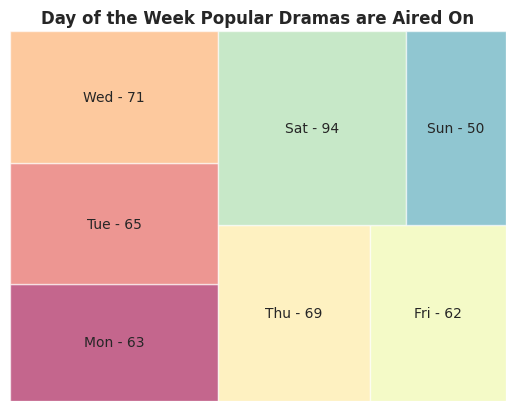

In [27]:
# Tree Map of which days of the week popular dramas are aired on
import squarify

sns.set_style(style = "whitegrid")
labels = days_of_week_freq["Day of Week"]
colors = [plt.cm.Spectral(i / float(len(labels))) for i in range(len(labels))]
treemap_labels = [x + " - " for x in labels] + days_of_week_freq["Frequency"].astype(str)
squarify.plot(sizes = days_of_week_freq["Frequency"], label = treemap_labels, alpha = 0.6, color = colors)
plt.title("Day of the Week Popular Dramas are Aired On", weight = "bold")
plt.axis('off')
plt.show()

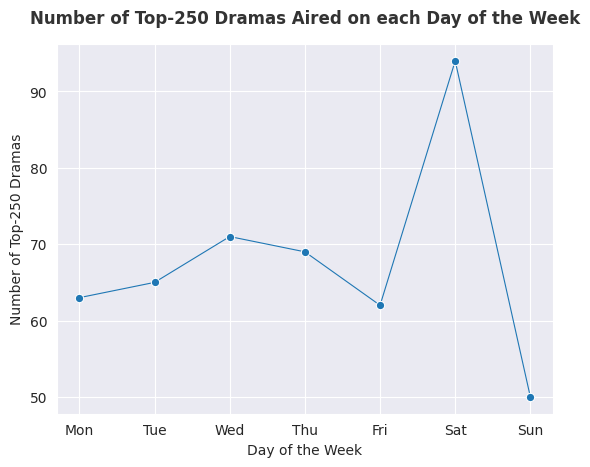

In [28]:
# Line plot of number of top-250 dramas aired on each day of the week
sns.set_style(style = "darkgrid")
daysofweek_plot = sns.lineplot(data = days_of_week_freq, x = "Day of Week", y = "Frequency", marker = "o", linewidth = 0.8)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Top-250 Dramas")
plt.title("Number of Top-250 Dramas Aired on each Day of the Week", pad = 15, color = "#333333", weight = "bold")
plt.show()

In [29]:
# Number of dramas aired on each day for each rank range
dayofweek_columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rankrange_df = days_of_week_df.groupby(["RankRange"])[dayofweek_columns].sum()

# Reorder by days of the week
rankrange_df = rankrange_df.loc[["1 - 50", "51 - 100", "101 - 150", "151 - 200", "201 - 250"]]

# Abbreviate days of the week
rankrange_df.rename({"Monday": "Mon", "Tuesday": "Tues", "Wednesday": "Wed", "Thursday": "Thurs", "Friday": "Fri", "Saturday": "Sat", "Sunday": "Sun"}, axis = 1, inplace = True)

# Swap rows and columns
rankrange_df = rankrange_df.T
rankrange_df

RankRange,1 - 50,51 - 100,101 - 150,151 - 200,201 - 250
Mon,8,14,12,15,14
Tues,8,14,13,14,16
Wed,9,11,15,22,14
Thurs,11,11,13,20,14
Fri,17,13,13,11,8
Sat,26,21,20,8,19
Sun,14,12,9,2,13


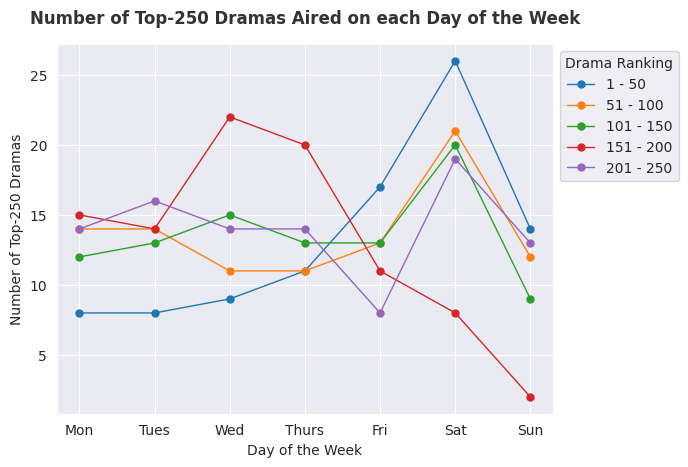

In [30]:
# Line plot of number of top-250 dramas aired on each day of the week for each rank range
rankrange_df.plot(marker = "o", markersize = 5, linewidth = 1)

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', title = "Drama Ranking")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Top-250 Dramas")
plt.title("Number of Top-250 Dramas Aired on each Day of the Week", pad = 15, color = "#333333", weight = "bold")
plt.show()

# 5. Recommendation System

In [31]:
# Convert cast to list
kdrama_df["Cast"] = kdrama_df["Cast"].map(lambda casts: casts.split(", "))

In [32]:
# Extract top 5 actors
kdrama_df["Top 5 Actors"] = kdrama_df["Cast"].apply(lambda x : list(x)[:5] if isinstance(x, list) else [])

# Join list of top 5 actors into string
kdrama_df["Top 5 Actors"] = kdrama_df["Top 5 Actors"].apply(lambda x : ", ".join(x))

In [33]:
# Convert features to strings
kdrama_df["Number of Episodes"] = kdrama_df["Number of Episodes"].astype(str)
kdrama_df["Genre"] = kdrama_df["Genre"].astype(str)
kdrama_df["Tags"] = kdrama_df["Tags"].astype(str)
kdrama_df["Top 5 Actors"] = kdrama_df["Top 5 Actors"].astype(str)

In [34]:
# Features used for recommender
extract_features = ["Number of Episodes", "Genre", "Tags", "Top 5 Actors"]

# Combine all features into one string
kdrama_df["Combined Features"] = kdrama_df[extract_features].apply(lambda x: ", ".join(x), axis = 1)
kdrama_df["Combined Features"]

0      10, Life,  Drama,  Family , Autism, Uncle-Neph...
1      16, Thriller,  Romance,  Crime,  Melodrama , M...
2      12, Friendship,  Romance,  Life,  Medical , St...
3      12, Friendship,  Romance,  Life,  Medical , Wo...
4      16, Psychological,  Life,  Drama,  Family , Ag...
                             ...                        
245    16, Historical, Romance, Medical, Fantasy, Tim...
246    20, Historical, Romance, Melodrama, Political,...
247    16, Law, Romance, Life, Drama, Alzheimer's Dis...
248    20, Horror, Comedy, Romance, Fantasy, Ghost-se...
249    14, Action, Thriller, Mystery, Crime, Investig...
Name: Combined Features, Length: 250, dtype: object

In [35]:
# Calculate word weightage in combined features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = "word", stop_words = "english")
vec_matrix = vectorizer.fit_transform(kdrama_df["Combined Features"])

In [36]:
# Calculate similarity score between each pair of dramas
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(vec_matrix)
similarity_matrix

array([[1.        , 0.03223875, 0.08014603, ..., 0.19964104, 0.08531444,
        0.06585763],
       [0.03223875, 1.        , 0.02408548, ..., 0.03505064, 0.11916618,
        0.11037812],
       [0.08014603, 0.02408548, 1.        , ..., 0.08297465, 0.07601846,
        0.04235218],
       ...,
       [0.19964104, 0.03505064, 0.08297465, ..., 1.        , 0.06834958,
        0.04959811],
       [0.08531444, 0.11916618, 0.07601846, ..., 0.06834958, 1.        ,
        0.20021601],
       [0.06585763, 0.11037812, 0.04235218, ..., 0.04959811, 0.20021601,
        1.        ]])

In [37]:
def rec_top_5(drama, print_rec = True):
  '''
  Recommend 5 other dramas based on user's input drama

  Args:
  -----
  drama: Name of user's input drama

  Returns:
  --------
  Print top 5 recommended dramas based on similarity score
  '''

  # Index of user's input drama
  index = kdrama_df.loc[(kdrama_df["Name"] == drama)].index[0]

  # Sort similarity scores with other dramas
  similarity_ranking = np.argsort(similarity_matrix[index])

  # Extract index of top 5 similar dramas
  top_5_index = similarity_ranking[-6:-1][::-1]

  # Store top 5 recommended dramas in list
  top_5_dramas = []

  for rank, idx in enumerate(top_5_index):
    recommend = kdrama_df.iloc[idx]["Name"]
    top_5_dramas.append(recommend)

    # Print top 5 recommended dramas
    if print_rec:
      print("#{rank}: ".format(rank = rank + 1) + recommend)

  return top_5_dramas

In [38]:
# Keep prompting user until valid input drama
while True:
  try:
    drama = input("Enter the name of your favorite drama: ")
    rec_top_5(drama)
    break

  # Drama name not in database
  except IndexError:
    print("Sorry, drama not found. Please try again!")

Enter the name of your favorite drama: Descendants of the Sun
#1: Just Between Lovers
#2: Vincenzo
#3: Player
#4: Arthdal Chronicles Part 1
#5: Chicago Typewriter


In [39]:
# Extract list of top 250 dramas
top_250_dramas = kdrama_df["Name"].tolist()

# Make predictions for all 250 dramas
pred_popularity = {}
for drama in top_250_dramas:
  top_5_dramas = rec_top_5(drama, print_rec = False)
  for recommend in top_5_dramas:
    if recommend in pred_popularity:
      pred_popularity[recommend] += 1
    else:
      pred_popularity[recommend] = 1

# Sort prediction popularity in desc order
pred_popularity = sorted(pred_popularity.items(), key = lambda x: x[1], reverse = True)

In [40]:
# Create dataframe of prediction popularity
top5_occurrence_df = pd.DataFrame(pred_popularity, columns = ["Drama", "Number of Recommendations"])

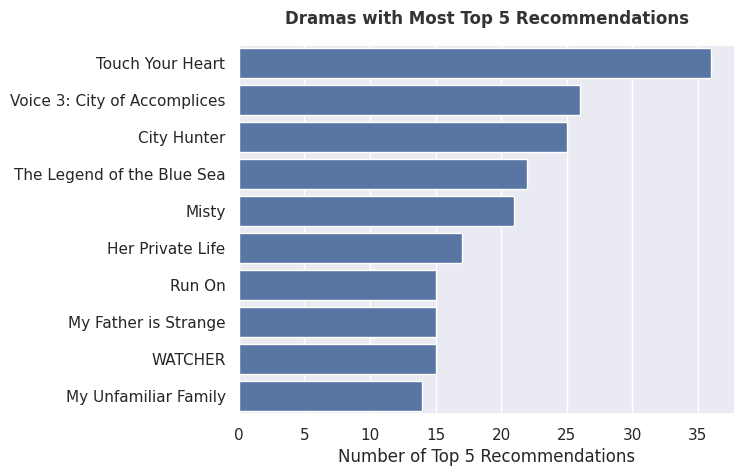

In [41]:
# Bar chart of top 10 dramas with most recommendations
barchart_df = top5_occurrence_df.head(10)
sns.set(style="darkgrid")
top5_occurrence_plot = sns.barplot(data = barchart_df, x = "Number of Recommendations", y = "Drama")
top5_occurrence_plot.set(ylabel = None)
plt.xlabel("Number of Top 5 Recommendations")
plt.title("Dramas with Most Top 5 Recommendations", pad = 15, color = "#333333", weight = "bold")
plt.show()

In [42]:
# Create instance of directed graph
rec_graph = nx.DiGraph()

# Add pairs of (drama, recommended drama) as edge
for drama in top_250_dramas[:50]:
  top_5_dramas = rec_top_5(drama, print_rec = False)
  for rec in top_5_dramas:
    rec_graph.add_edge(drama, rec)

# Create interactive graph
net = Network(directed = True, notebook = True, cdn_resources = "remote")
net.from_nx(rec_graph)
net.show("network.html")
IPython.display.HTML("network.html")

network.html
